# HW #3
## Fall 2024
## 38429-02 Introduction to Machine Learning
## 2076285 이강희

# [Simple Two Hidden Layer Deep Learning]

### preprocess the dataset

In [ ]:
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

### scale the pixel intensities and convert them to floats & separate datas into training datas and validation datas

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

### check the data

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

validation set에는 5000개의 data가 있고, test set에는 10000개의 data가 있다.

### Implement a two hidden layer neural network

In [ ]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor  # 학습률 증가 비율 (1.005)
        self.rates = []       # 학습률을 저장
        self.losses = []      # 손실 값을 저장

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])  # 현재 배치의 손실값 저장

factor=1.005: 학습률이 매 배치마다 0.5%씩 증가시키고, **rates**와 **losses**에 각각 학습률과 손실값을 기록한다

### Train the model on the training data

In [ ]:
import numpy as np

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # 28x28 이미지를 1차원 배열로 변환
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 출력층: 10개의 클래스
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


학습률 1e-3으로 시작해 각 반복에서 0.5%씩 증가시켜보고, 모델을 1 epoch 동안 훈련해본다.

In [ ]:
history = model.fit(X_train, y_train, epochs=1, # 1 에포크 동안 학습
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5432 - loss: nan - val_accuracy: 0.0990 - val_loss: nan


### plot the loass as a function of learning rate

Text(0, 0.5, 'Loss')

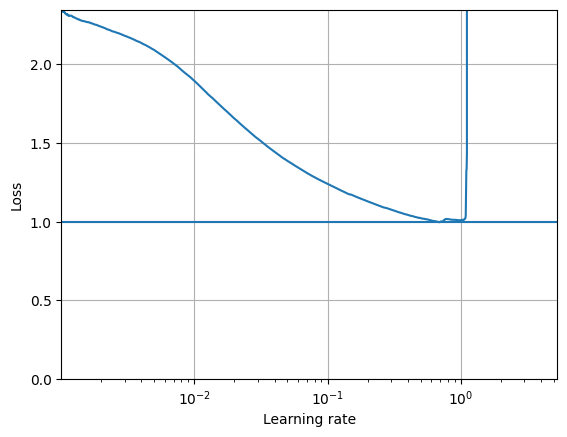

In [ ]:
import matplotlib.pyplot as plt

plt.plot(expon_lr.rates, expon_lr.losses)  # 학습률에 따른 손실값 그래프
plt.gca().set_xscale('log')  # x축을 로그 스케일로 설정
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))  # 최소 손실값 기준선
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
from pathlib import Path

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
run_index = 1
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8683 - loss: 0.4122 - val_accuracy: 0.9670 - val_loss: 0.1108
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9695 - loss: 0.1012 - val_accuracy: 0.9744 - val_loss: 0.0881
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0643 - val_accuracy: 0.9758 - val_loss: 0.0833
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9760 - val_loss: 0.0870
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9756 - val_loss: 0.0910
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9762 - val_loss: 0.0899
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9786 - val_loss: 0.1002
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0

### Evaluate the model's performance on the testing data

In [ ]:
model = tf.keras.models.load_model("my_mnist_model.keras")
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0945


[0.0761919915676117, 0.9771999716758728]

### Analyze and discuss the results

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs

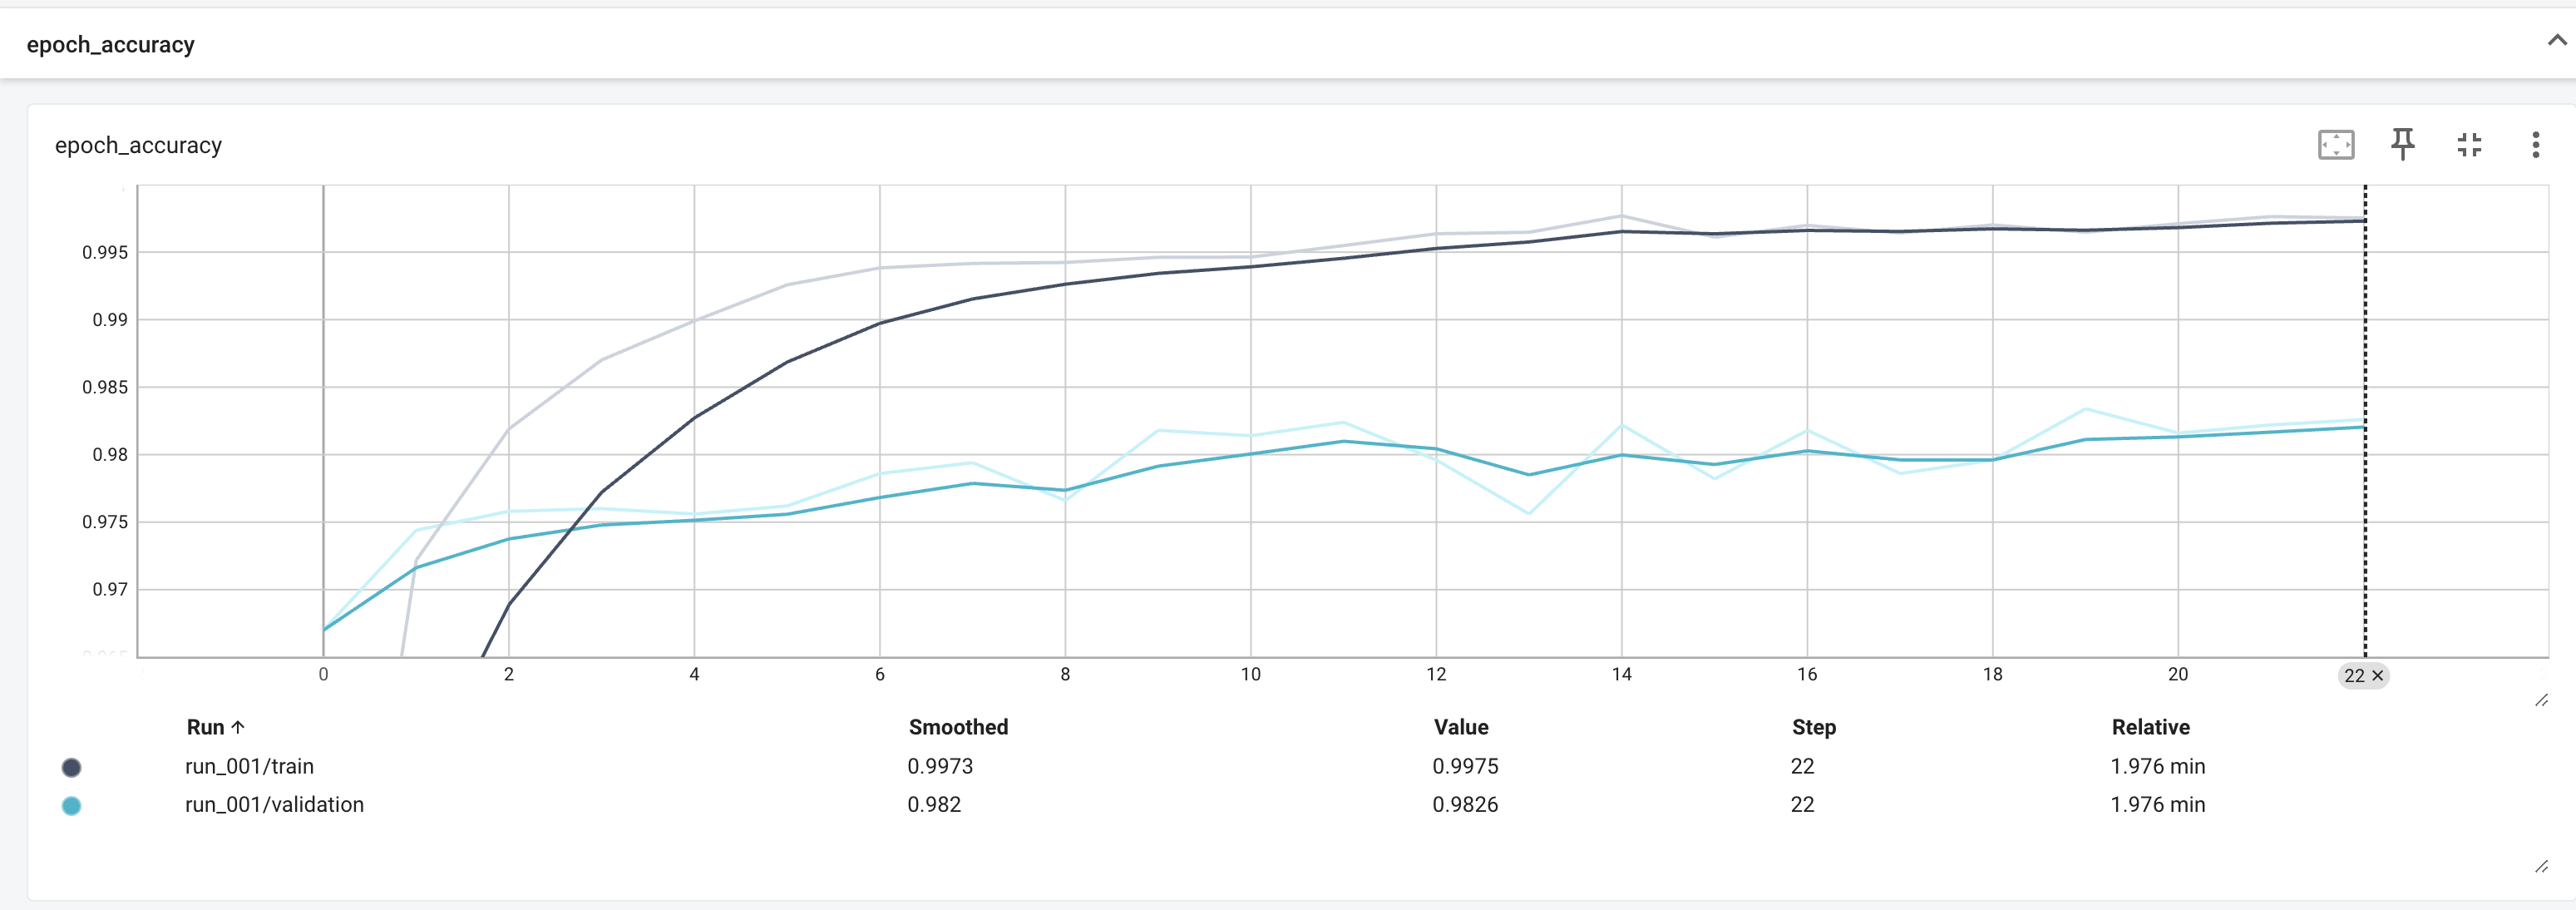

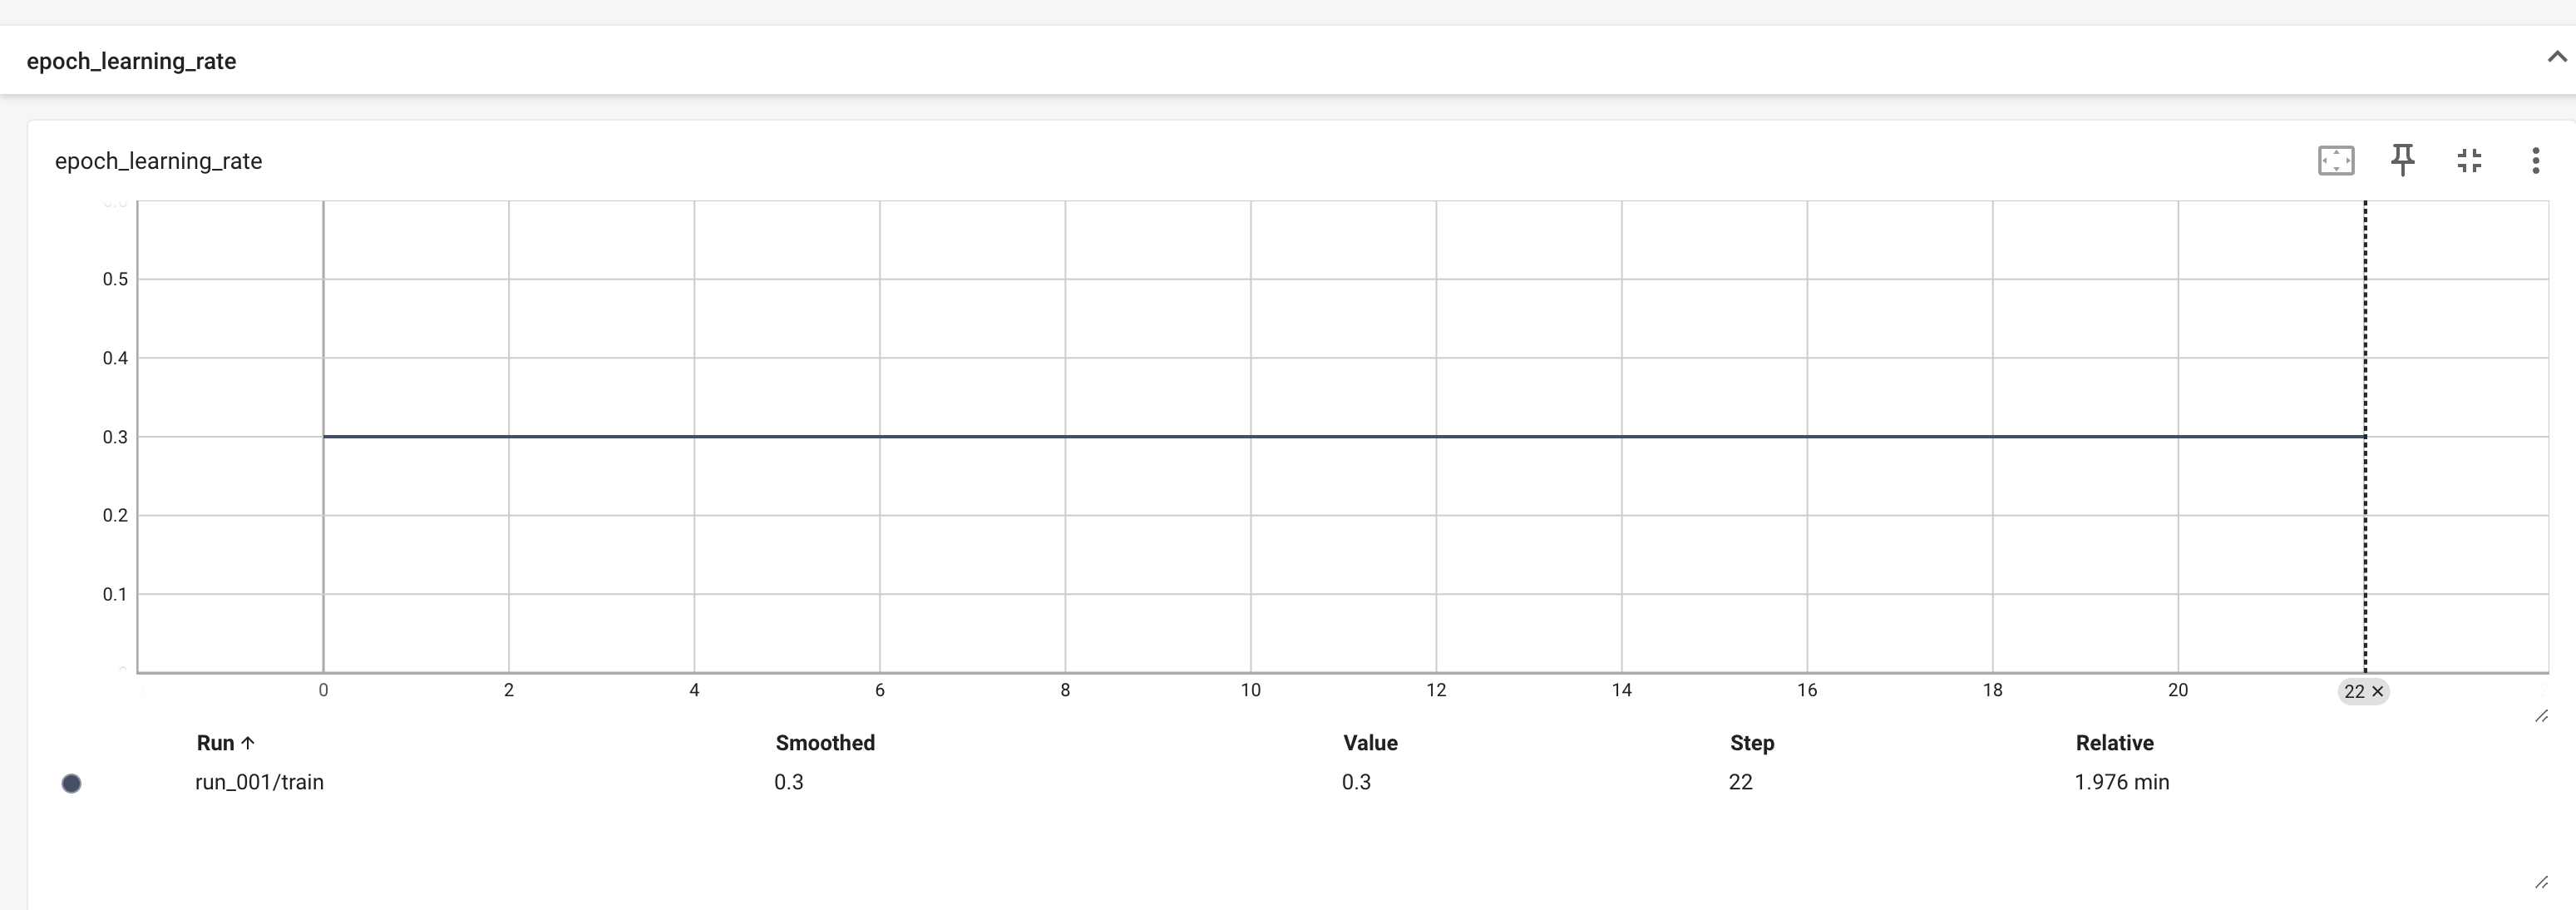

**Test Data Performance Analysis**

- Test Accuracy: 97.5%, 모델이 새로운 테스트 데이터에서도 높은 수준의 예측 정확도를 유지하고 있다.
- Test Loss: 0.081, 클래스 확률 예측을 정확히 수행하고 있다.
- 비교: 훈련 정확도는 99.7%, 검증 정확도는 98.1%였고, 테스트 정확도는 97.5%이다. 테스트 정확도가 훈련 및 검증 정확도보다는 낮지만, 큰 차이가 나지 않는다. 모델이 과적합되지 않았고, 학습 데이터의 패턴을 잘 일반화할 수 있다는 것을 의미한다.

**Confusion Matrix Analysis**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


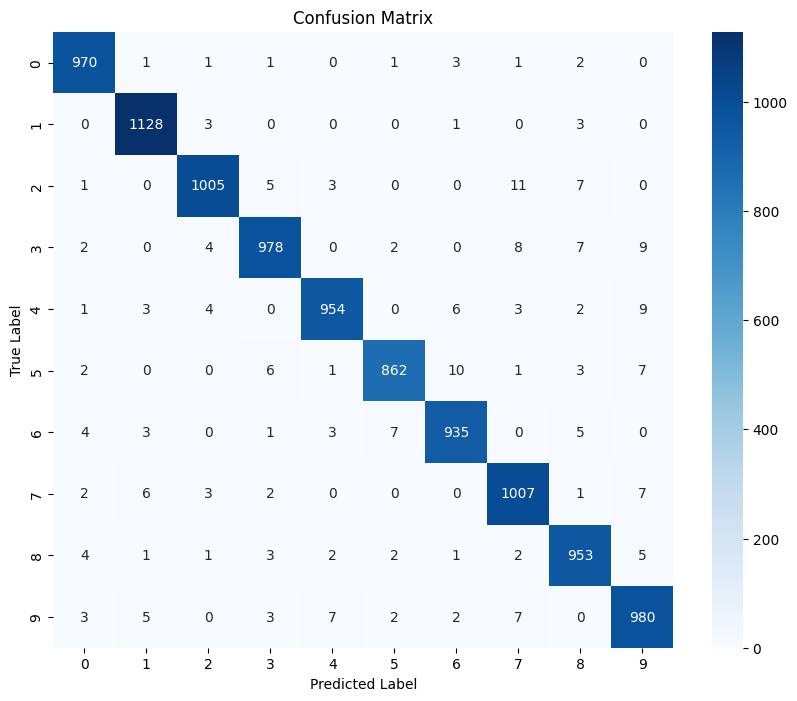

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=1)

conf_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

클래스 6과 4, 5, 9 등에서 잘못된 예측이 발생했다. 클래스 6이 5로 잘못 분류된 횟수가 4번, 클래스 9가 4나 5로 잘못 예측된 경우도 있다. 특히 클래스 5는 860번 정확히 예측되었지만 15번이나 잘못된 예측을 했다.

5와 비슷한 모양의 클래스에 대해 예측 성능을 높일 수 있도록 개선해야 할 것으로 보인다. 클래스 5와 9처럼 혼동이 많이 발생하는 클래스들에 대해 클래스별 가중치를 조정해 모델이 해당 클래스의 예측에 더 신경을 쓸 수 있도록 하는 것이 좋은 개선 방향으로 보여진다.

### Different Hyperparameters

In [ ]:
from tensorflow.keras import layers, optimizers

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def build_model(activation="relu", optimizer=None):
    model = tf.keras.Sequential([
        layers.Input(shape=[28, 28]),
        layers.Flatten(),
        layers.Dense(300, activation=activation),
        layers.Dense(100, activation=activation),
        layers.Dense(10, activation="softmax") # 출력층: 10개의 클래스
    ])
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model

activations = ["relu", "sigmoid", "tanh"]

results = {}
for activation in activations:
    for optimizer_name in ["SGD", "Momentum", "RMSprop", "Adam"]:
        if optimizer_name == "SGD":
            optimizer = optimizers.SGD(learning_rate=0.01)
        elif optimizer_name == "Momentum":
            optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
        elif optimizer_name == "RMSprop":
            optimizer = optimizers.RMSprop(learning_rate=0.001)
        elif optimizer_name == "Adam":
            optimizer = optimizers.Adam(learning_rate=0.001)

        model = build_model(activation=activation, optimizer=optimizer)
        print(f"\nTraining model with activation='{activation}' and optimizer='{optimizer_name}'\n")
        history = model.fit(
            X_train, y_train,
            epochs=10,
            validation_data=(X_valid, y_valid),
            verbose=0
        )

        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[(activation, optimizer_name)] = test_acc
        print(f"Test Accuracy with activation='{activation}', optimizer='{optimizer_name}': {test_acc:.4f}")

print("\nExperimental Results:")
for (activation, optimizer_name), accuracy in results.items():
    print(f"Activation: {activation}, Optimizer: {optimizer_name}, Test Accuracy: {accuracy:.4f}")


Training model with activation='relu' and optimizer='SGD'

Test Accuracy with activation='relu', optimizer='SGD': 0.9665

Training model with activation='relu' and optimizer='Momentum'

Test Accuracy with activation='relu', optimizer='Momentum': 0.9809

Training model with activation='relu' and optimizer='RMSprop'

Test Accuracy with activation='relu', optimizer='RMSprop': 0.9763

Training model with activation='relu' and optimizer='Adam'

Test Accuracy with activation='relu', optimizer='Adam': 0.9771

Training model with activation='sigmoid' and optimizer='SGD'

Test Accuracy with activation='sigmoid', optimizer='SGD': 0.8999

Training model with activation='sigmoid' and optimizer='Momentum'

Test Accuracy with activation='sigmoid', optimizer='Momentum': 0.9574

Training model with activation='sigmoid' and optimizer='RMSprop'

Test Accuracy with activation='sigmoid', optimizer='RMSprop': 0.9784

Training model with activation='sigmoid' and optimizer='Adam'

Test Accuracy with activat

가장 최적의 조합은 ReLU 활성화 함수와 Momentum 최적화 기법을 사용하는 조합이다. 테스트 정확도가 98.09%로 다른 조합에 비해 성능이 가장 우수하다.

가장 좋은 조합인 ReLU + Momentum을 기반으로 하이퍼파라미터 튜닝을 더 진행하여 모델을 개선해볼 수 있다.

최적의 조합인 ReLU + Momentum을 유지하면서, hiddden 유닛, learning rate, epoch를 다양하게 적용해볼 수 있다.

In [ ]:
import random

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def build_model(hidden_units=[300, 100], learning_rate=0.01, use_dropout=False, use_batch_norm=False):
    model = tf.keras.Sequential([
        layers.Input(shape=[28, 28]),
        layers.Flatten()
    ])
    for units in hidden_units:
        model.add(layers.Dense(units, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))

    optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model

hidden_units_options = [
    [300, 100],
    [500, 300],
    [800, 300],
    [100, 50]
]

learning_rates = [0.01, 0.005, 0.001, 0.0005]
epochs_list = [50, 100, 300]

all_combinations = [(hu, lr, ep) for hu in hidden_units_options for lr in learning_rates for ep in epochs_list]
selected_combinations = random.sample(all_combinations, 6)

results = {}

for hidden_units, learning_rate, epochs in selected_combinations:
    model = build_model(hidden_units=hidden_units, learning_rate=learning_rate)
    print(f"\nTraining model with hidden_units={hidden_units}, learning_rate={learning_rate}, epochs={epochs}\n")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping_cb],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[(tuple(hidden_units), learning_rate, epochs)] = test_acc
    print(f"Test Accuracy with hidden_units={hidden_units}, learning_rate={learning_rate}, epochs={epochs}: {test_acc:.4f}")

print("\nExperimental Results:")
for (hidden_units, learning_rate, epochs), accuracy in results.items():
    print(f"Hidden Units: {hidden_units}, Learning Rate: {learning_rate}, Epochs: {epochs}, Test Accuracy: {accuracy:.4f}")


Training model with hidden_units=[300, 100], learning_rate=0.01, epochs=100

Test Accuracy with hidden_units=[300, 100], learning_rate=0.01, epochs=100: 0.9825

Training model with hidden_units=[300, 100], learning_rate=0.001, epochs=300

Test Accuracy with hidden_units=[300, 100], learning_rate=0.001, epochs=300: 0.9755

Training model with hidden_units=[500, 300], learning_rate=0.005, epochs=100

Test Accuracy with hidden_units=[500, 300], learning_rate=0.005, epochs=100: 0.9829

Training model with hidden_units=[300, 100], learning_rate=0.005, epochs=50

Test Accuracy with hidden_units=[300, 100], learning_rate=0.005, epochs=50: 0.9796

Training model with hidden_units=[100, 50], learning_rate=0.0005, epochs=50

Test Accuracy with hidden_units=[100, 50], learning_rate=0.0005, epochs=50: 0.9634

Training model with hidden_units=[800, 300], learning_rate=0.005, epochs=300

Test Accuracy with hidden_units=[800, 300], learning_rate=0.005, epochs=300: 0.9817

Experimental Results:
Hidde

Hidden Units: [500, 300], Learning Rate: 0.005, Epochs: 100 에서 가장 높은 성능을 기록했다.

다만 이는 GPU 사양을 고려하여 Early Stopping을 사용하여 모델이 더 이상 개선되지 않으면 학습을 멈추도록 하였으며, 랜덤하게 6개의 하이퍼파라미터 조합을 선택해 모델을 학습하고 테스트하도록 구성하였다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


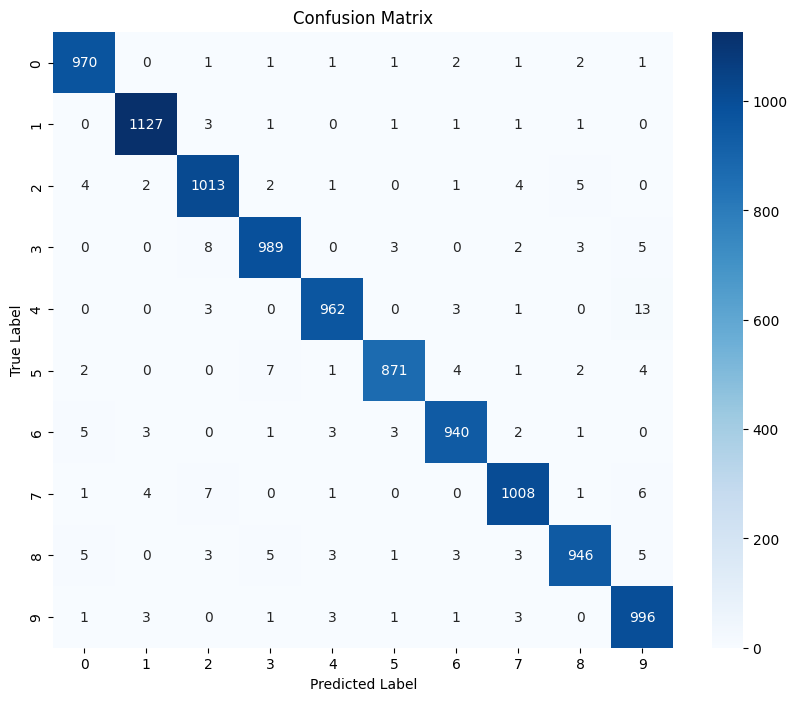

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def build_model(hidden_units=[500, 300], learning_rate=0.005):
    model = tf.keras.Sequential([
        layers.Input(shape=[28, 28]),
        layers.Flatten()
    ])
    for units in hidden_units:
        model.add(layers.Dense(units, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))

    optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model

model = build_model(hidden_units=[500, 300], learning_rate=0.005)
model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=0
)

y_pred = model.predict(X_test).argmax(axis=1)
conf_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Confusion Matrix Analysis**

대부분의 클래스에서 높은 정확도를 보이고 있으며, 모델이 좋은 일반화 성능을 가지고 있음을 확인할 수 있다. '5'와 '3', '4'와 '9' 사이의 혼동이 빈번히 발생하는 부분에 대해, 데이터 증강 및 가중치 조정을 통해 성능을 개선한다면 더욱 좋은 성능을 낼 것으로 기대된다.

## 결론

1번 문항에서는 MNIST 데이터셋에 대해 여러 hyperparameter (hidden units 수, learning rate, epochs 수 등)와 optimization technique을 조합하여 모델의 성능을 평가하였다. 다양한 activation function과 optimizer를 실험한 결과, ReLU activation function과 Momentum optimizer를 사용한 경우 최고의 성능을 보였다. 이 최적의 조합을 바탕으로 하이퍼파라미터를 조정하여 추가 실험을 진행하였으며, hidden units 수를 500, 300으로 설정하고 learning rate 0.005와 epochs 100을 사용한 경우 98.29%의 test accuracy를 달성하였다.

이 결과는 기존의 실험 대비 성능이 향상되었음을 의미한다. 특히, confusion matrix 분석을 통해 클래스 간 혼동이 발생하는 부분을 식별하였고, 이를 개선하기 위한 방법 (data augmentation, 클래스별 weight adjustment 등)을 제안할 수 있었다.

따라서 이번 실험의 최종 결과는, hyperparameter tuning과 optimizer 조정을 통해 모델의 generalization performance가 향상되었음을 확인하였으며, 이는 test data에서도 높은 정확도를 유지하는 데 기여하였다. 향후 data augmentation 등의 추가적인 기법을 활용하여 특정 클래스 간의 혼동을 줄이고 성능을 더욱 높일 수 있을 것으로 기대된다.